In [46]:
import numpy as np
import numpy.ma as ma
import dynamic as dy
import netCDF4
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from importlib import reload
from scipy.stats import gaussian_kde

dy = reload(dy)


In [47]:
plotdir = '/storage/silver/MONC_data/Alanna/dry_CBL/plots/dyn/gauss_pi_2/'

In [48]:
file20m = '/storage/silver/scenario/si818415/phd/20mLES/cbl_13200.nc'
data20m = Dataset(file20m, mode='r')

print(data20m.variables['time_series_300_300'][...])

[12946.47265625 13273.69824219]


In [49]:
file20f = '/storage/silver/MONC_data/Alanna/dry_CBL/20m_gauss_sig_Delta'
#'/storage/silver/scenario/si818415/phd/20mLES/20m_gauss_S_ij/cbl_13200_gauss_filter_ga00.nc'
data20f = Dataset(file20f+str('/cbl_13200__filter_ga00.nc'), mode='r')
#print(data20f.variables)
data20_4D = Dataset(file20f+str('/cbl_13200__filter_ga01.nc'), mode='r')

In [64]:
file20c = '/storage/silver/MONC_data/Alanna/dry_CBL/20m_gauss_sig_Delta_coarse/'
#'/storage/silver/scenario/si818415/phd/20mLES/20m_gauss_S_ij/cbl_13200_gauss_filter_ga00.nc'
data20_8D = Dataset(file20c+str('/cbl_13200_filter_ga00.nc'), mode='r')
#print(data20f.variables)
data20_16D = Dataset(file20c+str('/cbl_13200_filter_ga01.nc'), mode='r')

In [ ]:
print(data20f.variables)

In [51]:
print(data20f.ncattrs())
print(data20_4D.getncattr('sigma'))

['Parent file', 'filter_def_id', 'filter_type', 'ndim', 'wavenumber', 'delta_x', 'width', 'cutoff', 'high_pass', 'sigma', 'FFT_type', 'save_all', 'th_ref', 'dx', 'dy']
40


In [52]:
# file20_4D = '/storage/silver/scenario/si818415/phd/20mLES/20m_gauss_S_ij_4Delta/cbl_13200_gauss_filter_ga00.nc'
# data20_4D = Dataset(file20_4D, mode='r')
#print(data20f.variables)

In [57]:
file20d = '/storage/silver/scenario/si818415/phd/20mLES/20m_gauss_S_ij/cbl_13200_gauss.nc'
data20d = Dataset(file20d, mode='r')
#print(data20d.variables)

In [58]:
u_f = data20f.variables['u_on_p_r'][:,:,:,:]
v_f = data20f.variables['v_on_p_r'][:,:,:,:]
w_f = data20f.variables['w_on_p_r'][:,:,:,:]

uu_f = data20f.variables['u_on_p.u_on_p_r'][:,:,:,:]
uv_f = data20f.variables['u_on_p.v_on_p_r'][:,:,:,:]
uw_f = data20f.variables['u_on_p.w_on_p_r'][:,:,:,:]
vv_f = data20f.variables['v_on_p.v_on_p_r'][:,:,:,:]
vw_f = data20f.variables['v_on_p.w_on_p_r'][:,:,:,:]
ww_f = data20f.variables['w_on_p.w_on_p_r'][:,:,:,:]

In [59]:
u_f4 = data20_4D.variables['u_on_p_r'][:,:,:,:]
v_f4 = data20_4D.variables['v_on_p_r'][:,:,:,:]
w_f4 = data20_4D.variables['w_on_p_r'][:,:,:,:]

uu_f4 = data20_4D.variables['u_on_p.u_on_p_r'][:,:,:,:]
uv_f4 = data20_4D.variables['u_on_p.v_on_p_r'][:,:,:,:]
uw_f4 = data20_4D.variables['u_on_p.w_on_p_r'][:,:,:,:]
vv_f4 = data20_4D.variables['v_on_p.v_on_p_r'][:,:,:,:]
vw_f4 = data20_4D.variables['v_on_p.w_on_p_r'][:,:,:,:]
ww_f4 = data20_4D.variables['w_on_p.w_on_p_r'][:,:,:,:]

In [65]:
u_f8 = data20_8D.variables['u_on_p_r'][:,:,:,:]
v_f8 = data20_8D.variables['v_on_p_r'][:,:,:,:]
w_f8 = data20_8D.variables['w_on_p_r'][:,:,:,:]

uu_f8 = data20_8D.variables['u_on_p.u_on_p_r'][:,:,:,:]
uv_f8 = data20_8D.variables['u_on_p.v_on_p_r'][:,:,:,:]
uw_f8 = data20_8D.variables['u_on_p.w_on_p_r'][:,:,:,:]
vv_f8 = data20_8D.variables['v_on_p.v_on_p_r'][:,:,:,:]
vw_f8 = data20_8D.variables['v_on_p.w_on_p_r'][:,:,:,:]
ww_f8 = data20_8D.variables['w_on_p.w_on_p_r'][:,:,:,:]

In [66]:
u_f16 = data20_16D.variables['u_on_p_r'][:,:,:,:]
v_f16 = data20_16D.variables['v_on_p_r'][:,:,:,:]
w_f16 = data20_16D.variables['w_on_p_r'][:,:,:,:]

uu_f16 = data20_16D.variables['u_on_p.u_on_p_r'][:,:,:,:]
uv_f16 = data20_16D.variables['u_on_p.v_on_p_r'][:,:,:,:]
uw_f16 = data20_16D.variables['u_on_p.w_on_p_r'][:,:,:,:]
vv_f16 = data20_16D.variables['v_on_p.v_on_p_r'][:,:,:,:]
vw_f16 = data20_16D.variables['v_on_p.w_on_p_r'][:,:,:,:]
ww_f16 = data20_16D.variables['w_on_p.w_on_p_r'][:,:,:,:]

In [67]:
w = data20d.variables['w_on_p'][:,:,:,:]
zn = data20m.variables['zn'][:]

In [68]:
#print(data20f.variables)

In [69]:
hat_Sij_abs_S2 = data20f.variables['S_ij_abs_S_r'][:,:,:,:,:] #newer filtered output 
hat_Sij2 = data20f.variables['S_ij_r'][:,:,:,:,:]             # dont need _filt

In [70]:
hat_Sij_abs_S4 = data20_4D.variables['S_ij_abs_S_r'][:,:,:,:,:]
hat_Sij4 = data20_4D.variables['S_ij_r'][:,:,:,:,:]

In [71]:
hat_Sij_abs_S8 = data20_8D.variables['S_ij_abs_S_r'][:,:,:,:,:]
hat_Sij8 = data20_8D.variables['S_ij_r'][:,:,:,:,:]

In [72]:
hat_Sij_abs_S16 = data20_16D.variables['S_ij_abs_S_r'][:,:,:,:,:]
hat_Sij16 = data20_16D.variables['S_ij_r'][:,:,:,:,:]

In [73]:
i_j = data20f.variables['i_j'][:]

In [74]:
print(dy.index_sym(2,1,i_j))

4


In [75]:
L2a = dy.L_ij_sym(u_f[0,:,:,:], v_f[0,:,:,:], w_f[0,:,:,:], uu_f[0,:,:,:], uv_f[0,:,:,:], uw_f[0,:,:,:], vv_f[0,:,:,:], vw_f[0,:,:,:], ww_f[0,:,:,:])
L2b = dy.L_ij_sym(u_f[1,:,:,:], v_f[1,:,:,:], w_f[1,:,:,:], uu_f[1,:,:,:], uv_f[1,:,:,:], uw_f[1,:,:,:], vv_f[1,:,:,:], vw_f[1,:,:,:], ww_f[1,:,:,:])

In [76]:
# L4 = dy.L_ij_sym(u_f4, v_f4, w_f4, uu_f4, uv_f4, uw_f4, vv_f4, vw_f4, ww_f4)
L4a = dy.L_ij_sym(u_f4[0,:,:,:], v_f4[0,:,:,:], w_f4[0,:,:,:], uu_f4[0,:,:,:], uv_f4[0,:,:,:], uw_f4[0,:,:,:], vv_f4[0,:,:,:], vw_f4[0,:,:,:], ww_f4[0,:,:,:])
L4b = dy.L_ij_sym(u_f4[1,:,:,:], v_f4[1,:,:,:], w_f4[1,:,:,:], uu_f4[1,:,:,:], uv_f4[1,:,:,:], uw_f4[1,:,:,:], vv_f4[1,:,:,:], vw_f4[1,:,:,:], ww_f4[1,:,:,:])

In [77]:
# L4 = dy.L_ij_sym(u_f4, v_f4, w_f4, uu_f4, uv_f4, uw_f4, vv_f4, vw_f4, ww_f4)
L8a = dy.L_ij_sym(u_f8[0,:,:,:], v_f8[0,:,:,:], w_f8[0,:,:,:], uu_f8[0,:,:,:], uv_f8[0,:,:,:], uw_f8[0,:,:,:], vv_f8[0,:,:,:], vw_f8[0,:,:,:], ww_f8[0,:,:,:])
L8b = dy.L_ij_sym(u_f8[1,:,:,:], v_f8[1,:,:,:], w_f8[1,:,:,:], uu_f8[1,:,:,:], uv_f8[1,:,:,:], uw_f8[1,:,:,:], vv_f8[1,:,:,:], vw_f8[1,:,:,:], ww_f8[1,:,:,:])

In [78]:
# L4 = dy.L_ij_sym(u_f4, v_f4, w_f4, uu_f4, uv_f4, uw_f4, vv_f4, vw_f4, ww_f4)
L16a = dy.L_ij_sym(u_f16[0,:,:,:], v_f16[0,:,:,:], w_f16[0,:,:,:], uu_f16[0,:,:,:], uv_f16[0,:,:,:], uw_f16[0,:,:,:], vv_f16[0,:,:,:], vw_f16[0,:,:,:], ww_f16[0,:,:,:])
L16b = dy.L_ij_sym(u_f16[1,:,:,:], v_f16[1,:,:,:], w_f16[1,:,:,:], uu_f16[1,:,:,:], uv_f16[1,:,:,:], uw_f16[1,:,:,:], vv_f16[1,:,:,:], vw_f16[1,:,:,:], ww_f16[1,:,:,:])

In [79]:
abs_S_hat_Sij_hat2a = dy.abs_S_hat_S_ij_hat(hat_Sij2[:,0,:,:,:])
abs_S_hat_Sij_hat2b = dy.abs_S_hat_S_ij_hat(hat_Sij2[:,1,:,:,:])

In [80]:
abs_S_hat_Sij_hat4a = dy.abs_S_hat_S_ij_hat(hat_Sij4[:,0,:,:,:])
abs_S_hat_Sij_hat4b = dy.abs_S_hat_S_ij_hat(hat_Sij4[:,1,:,:,:])

In [81]:
abs_S_hat_Sij_hat8a = dy.abs_S_hat_S_ij_hat(hat_Sij8[:,0,:,:,:])
abs_S_hat_Sij_hat8b = dy.abs_S_hat_S_ij_hat(hat_Sij8[:,1,:,:,:])

In [82]:
abs_S_hat_Sij_hat16a = dy.abs_S_hat_S_ij_hat(hat_Sij16[:,0,:,:,:])
abs_S_hat_Sij_hat16b = dy.abs_S_hat_S_ij_hat(hat_Sij16[:,1,:,:,:])

In [83]:
M2a = dy.M_ij(20, 40, hat_Sij2[:,0,:,:,:], hat_Sij_abs_S2[:,0,:,:,:])
M2b = dy.M_ij(20, 40, hat_Sij2[:,1,:,:,:], hat_Sij_abs_S2[:,1,:,:,:])

In [84]:
#M4 = dy.M_ij(20, 80, hat_Sij4, hat_Sij_abs_S4)
M4a = dy.M_ij(20, 80, hat_Sij4[:,0,:,:,:], hat_Sij_abs_S4[:,0,:,:,:])
M4b = dy.M_ij(20, 80, hat_Sij4[:,1,:,:,:], hat_Sij_abs_S4[:,1,:,:,:])

In [85]:
M8a = dy.M_ij(20, 160, hat_Sij8[:,0,:,:,:], hat_Sij_abs_S8[:,0,:,:,:])
M8b = dy.M_ij(20, 160, hat_Sij8[:,1,:,:,:], hat_Sij_abs_S8[:,1,:,:,:])

In [86]:
M16a = dy.M_ij(20, 320, hat_Sij16[:,0,:,:,:], hat_Sij_abs_S16[:,0,:,:,:])
M16b = dy.M_ij(20, 320, hat_Sij16[:,1,:,:,:], hat_Sij_abs_S16[:,1,:,:,:])

In [87]:
Cs_2D_sqa = dy.C_s_sq(L2a, M2a)
Cs_2D_sqb = dy.C_s_sq(L2b, M2b)

In [88]:
Cs_4D_sqa = dy.C_s_sq(L4a, M4a)
Cs_4D_sqb = dy.C_s_sq(L4b, M4b)

In [89]:
Cs_8D_sqa = dy.C_s_sq(L8a, M8a)
Cs_8D_sqb = dy.C_s_sq(L8b, M8b)

In [90]:
Cs_16D_sqa = dy.C_s_sq(L16a, M16a)
Cs_16D_sqb = dy.C_s_sq(L16b, M16b)

In [22]:
Cs_2D = (dy.get_Cs(Cs_2D_sqa) + dy.get_Cs(Cs_2D_sqb))/2

In [33]:
#Cs_4D = dy.get_Cs(Cs_4D_sq)
Cs_4D = (dy.get_Cs(Cs_4D_sqa) + dy.get_Cs(Cs_4D_sqb))/2

In [91]:
Cs_2D_ava, LM_2D_ava, MM_2D_ava, Cs_av_sq2a = dy.Cs_av_levels(L2a, M2a)
Cs_2D_avb, LM_2D_avb, MM_2D_avb, Cs_av_sq2b = dy.Cs_av_levels(L2b, M2b)

Cs_4D_ava, LM_4D_ava, MM_4D_ava, Cs_av_sq4a = dy.Cs_av_levels(L4a, M4a)
Cs_4D_avb, LM_4D_avb, MM_4D_avb, Cs_av_sq4b = dy.Cs_av_levels(L4b, M4b)

Cs_8D_ava, LM_8D_ava, MM_8D_ava, Cs_av_sq8a = dy.Cs_av_levels(L8a, M8a)
Cs_8D_avb, LM_8D_avb, MM_8D_avb, Cs_av_sq8b = dy.Cs_av_levels(L8b, M8b)

Cs_16D_ava, LM_16D_ava, MM_16D_ava, Cs_av_sq16a = dy.Cs_av_levels(L16a, M16a)
Cs_16D_avb, LM_16D_avb, MM_16D_avb, Cs_av_sq16b = dy.Cs_av_levels(L16b, M16b)

In [92]:
z = np.arange(0,2000,20)

In [93]:
Cs_2D_av = (Cs_2D_ava+Cs_2D_avb)/2
Cs_4D_av = (Cs_4D_ava+Cs_4D_avb)/2
Cs_8D_av = (Cs_8D_ava+Cs_8D_avb)/2
Cs_16D_av = (Cs_16D_ava+Cs_16D_avb)/2

In [94]:
beta1 = dy.beta_calc(Cs_av_sq2a, Cs_av_sq4a)
beta2 = dy.beta_calc(Cs_av_sq2b, Cs_av_sq4b)
beta = (beta1+beta2)/2

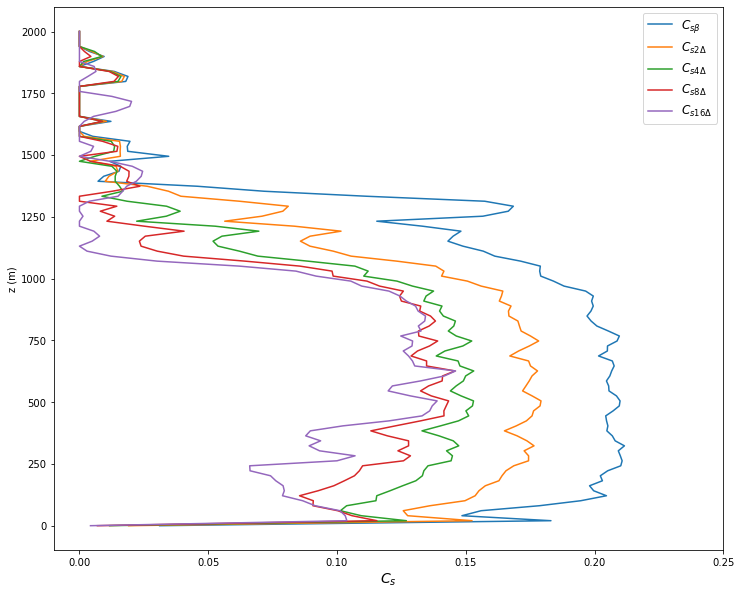

In [104]:
av_type = 'all_gauss'

fig = plt.figure(figsize=(12,10))#(1,2)
plt.plot(Cs_beta_prof, z, '-', markersize=6, label='$C_{s \\beta}$')
#plt.plot(10, 10, 'o', markersize=6) #get correct colour
plt.plot(Cs_2D_av, z, '-', markersize=6, label='$ C_{s 2 \\Delta} $')
plt.plot(Cs_4D_av, z, '-', markersize=6, label='$ C_{s 4 \\Delta} $')
plt.plot(Cs_8D_av, z, '-', markersize=6, label='$ C_{s 8 \\Delta} $')
plt.plot(Cs_16D_av, z, '-', markersize=6, label='$ C_{s 16 \\Delta} $')
plt.xlim(-0.01,0.25)
plt.ylabel('z (m)')
plt.xlabel('$ C_{s} $', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.savefig("Cs_profiles_t_av_all_line_"+str(av_type)+".png", pad_inches=0)

In [ ]:
def mixlen(z_in, Delta, Cs=0.23, k=0.4):
    mix_len = ((Cs*Delta)**(-2) + (k*z_in)**(-2))**(-1/2)
    return mix_len

In [99]:
z = np.linspace(0, 2000, 100)
mixlen_D20 = mixlen(z, 20)
mixlen_D40 = mixlen(z, 40)
mixlen_D80 = mixlen(z, 80)
mixlen_D160 = mixlen(z, 160)
mixlen_D320 = mixlen(z, 320)

/home/users/si818415/.conda/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


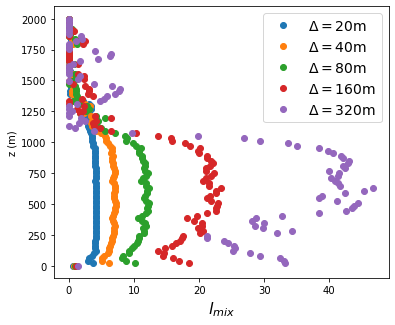

In [100]:
av_type = 'all_gauss'
z = np.linspace(0, 2000, 100)

fig = plt.figure(figsize=(6,5))#(1,2)
plt.plot(20*Cs_beta_prof, z, 'o', markersize=6, label='$\\Delta = 20$m')
plt.plot(40*Cs_2D_av, z, 'o', markersize=6, label='$\\Delta = 40$m')
plt.plot(80*Cs_4D_av, z, 'o', markersize=6, label='$\\Delta = 80$m')
plt.plot(160*Cs_8D_av, z, 'o', markersize=6, label='$\\Delta = 160$m')
plt.plot(320*Cs_16D_av, z, 'o', markersize=6, label='$\\Delta = 320$m')
#plt.xlim(-0.01,0.25)
plt.ylabel('z (m)')
plt.xlabel('$ l_{mix} $', fontsize=16)
plt.legend(fontsize=14, loc='upper right')
plt.savefig(plotdir+"l_mix_profiles_t_av_"+str(av_type)+".png", pad_inches=0)

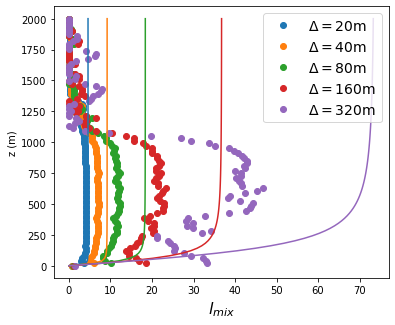

In [102]:
av_type = 'all_gauss'
z = np.linspace(0, 2000, 100)

fig = plt.figure(figsize=(6,5))#(1,2)
plt.plot(20*Cs_beta_prof, z, 'o', markersize=6, label='$\\Delta = 20$m')
plt.plot(40*Cs_2D_av, z, 'o', markersize=6, label='$\\Delta = 40$m')
plt.plot(80*Cs_4D_av, z, 'o', markersize=6, label='$\\Delta = 80$m')
plt.plot(160*Cs_8D_av, z, 'o', markersize=6, label='$\\Delta = 160$m')
plt.plot(320*Cs_16D_av, z, 'o', markersize=6, label='$\\Delta = 320$m')
plt.plot(mixlen_D20, z, color='tab:blue')
plt.plot(mixlen_D40, z, color='tab:orange')
plt.plot(mixlen_D80, z, color='tab:green')
plt.plot(mixlen_D160, z, color='tab:red')
plt.plot(mixlen_D320, z, color='tab:purple')
#plt.xlim(-0.01,0.25)
plt.ylabel('z (m)')
plt.xlabel('$ l_{mix} $', fontsize=16)
plt.legend(fontsize=14, loc='upper right')
plt.savefig("l_mix_profiles_t_av_inc_set_Cs"+str(av_type)+".png", pad_inches=0)

In [103]:
outfile = "dynamic_Cs.nc"
rootgrp = Dataset(outfile, mode="w")
dim1 = 100
rootgrp.createDimension('dimension_1', dim1)

var1Dims = ('dimension_1')
var1_out = rootgrp.createVariable("Cs_beta", "f", var1Dims)
var1_out[:] = Cs_beta_prof

var2Dims = ('dimension_1')
var2_out = rootgrp.createVariable("Cs_2Delta", "f", var2Dims)
var2_out[:] = Cs_2D_av

var3Dims = ('dimension_1')
var3_out = rootgrp.createVariable("Cs_4Delta", "f", var3Dims)
var3_out[:] = Cs_4D_av

var4Dims = ('dimension_1')
var4_out = rootgrp.createVariable("Cs_8Delta", "f", var4Dims)
var4_out[:] = Cs_2D_av

var5Dims = ('dimension_1')
var5_out = rootgrp.createVariable("Cs_16Delta", "f", var5Dims)
var5_out[:] = Cs_16D_av


var6Dims = ('dimension_1')
var6_out = rootgrp.createVariable("Cs_4Delta_test", "f", var6Dims)
var6_out[:] = Cs_4D_av

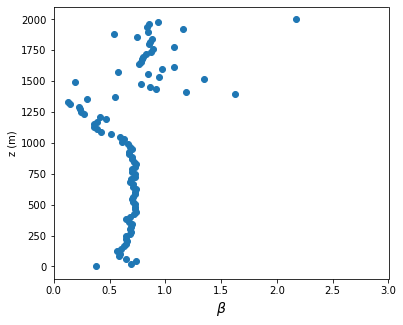

In [36]:
fig = plt.figure(figsize=(6,5))#(1,2)
z = np.linspace(0, 2000, 100)
plt.plot(beta, z, 'o', markersize=6, label='$\\beta$')
plt.ylabel('z (m)')
plt.xlabel('$ \\beta $', fontsize=14)
plt.xlim(0,3)
#plt.legend(fontsize=12, loc='upper right')
plt.savefig(plotdir+"beta_t_av_profiles.png", pad_inches=0)

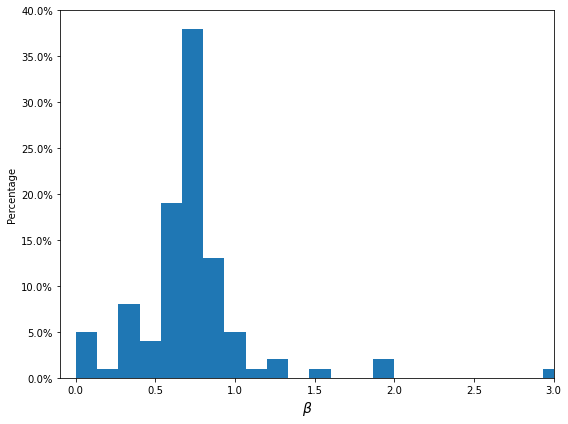

In [112]:
z_levels = np.arange(0, 2000, 20)

fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(8,6))
beta_set, bins, p = axs.hist(beta, range=(0,4), bins=30, density=True)  # density=False would make counts range=(-0.8,0.8),
for item in p:
    item.set_height(item.get_height()/sum(beta_set))
axs.set_ylabel('Percentage')#'Counts')#'Probability')
axs.set_xlabel('$\\beta $', fontsize=14)
axs.yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs.set_ylim(0,0.4)
axs.set_xlim(-0.1,3)
#plt.vlines(0, 0, 0.70)
plt.savefig(plotdir+"beta_dist.png", pad_inches=0)

In [36]:
Cs_beta_sq_profa = dy.Cs_sq_beta_dep(Cs_av_sq2a, beta1)
Cs_beta_sq_profb = dy.Cs_sq_beta_dep(Cs_av_sq2b, beta2)

In [37]:
Cs_beta_profa = dy.get_Cs(Cs_beta_sq_profa)
Cs_beta_profb = dy.get_Cs(Cs_beta_sq_profb)
Cs_beta_prof = (Cs_beta_profa+Cs_beta_profb)/2

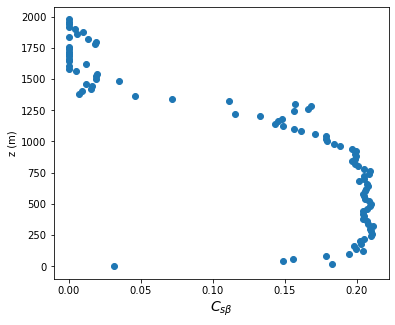

In [46]:
fig = plt.figure(figsize=(6,5))#(1,2)
z=np.arange(0,2000,20)
plt.plot(Cs_beta_prof, z, 'o', markersize=6, label='$C_{s \\beta}$')
plt.ylabel('z (m)')
plt.xlabel('$C_{s \\beta}$', fontsize=14)
#plt.xlim(0,2.7)
#plt.legend(fontsize=12, loc='upper right')
plt.savefig(plotdir+"Cs_beta_t_av_profiles.png", pad_inches=0)

In [38]:
Cs_2Delta = (Cs_2D_ava+Cs_2D_avb)/2
Cs_4Delta = (Cs_4D_ava+Cs_4D_avb)/2

In [48]:
outfile = "dynamic_Cs.nc"
rootgrp = Dataset(outfile, mode="w")
dim1 = 100
rootgrp.createDimension('dimension_1', dim1)

var1Dims = ('dimension_1')
var1_out = rootgrp.createVariable("Cs_beta", "f", var1Dims)
var1_out[:] = Cs_beta_prof

var2Dims = ('dimension_1')
var2_out = rootgrp.createVariable("Cs_2Delta", "f", var2Dims)
var2_out[:] = Cs_2Delta

var3Dims = ('dimension_1')
var3_out = rootgrp.createVariable("Cs_4Delta", "f", var3Dims)
var3_out[:] = Cs_4Delta


var4Dims = ('dimension_1')
var4_out = rootgrp.createVariable("Cs_4Delta_test", "f", var4Dims)
var4_out[:] = Cs_4Delta

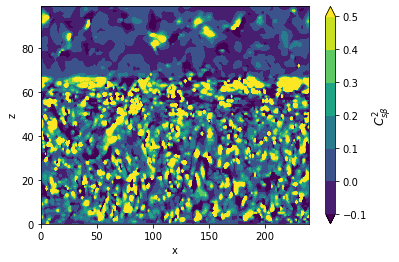

In [64]:
z_levels = np.linspace(0, 2000, 100)

y = 200

levels1 = np.linspace(-0.1,0.5,7)
cm1 = plt.contourf(np.transpose(Cs_beta_sq[:,y,:]), levels1, extend='both')

cb1 = plt.colorbar(cm1)

plt.xlabel("x")
plt.ylabel("z")
cb1.set_label("$C_{s \\beta}^2$", size=12)
plt.savefig(plotdir+"Cs_beta_sq_cross_sec.png", pad_inches=0)

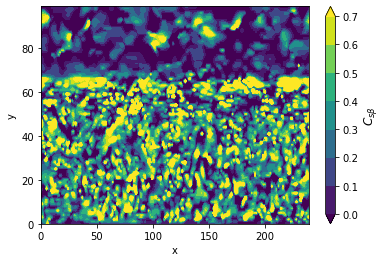

In [68]:
z_levels = np.linspace(0, 2000, 100)

y = 200

levels1 = np.linspace(0,0.7,8)
cm1 = plt.contourf(np.transpose(Cs_beta[:,y,:]), levels1, extend='both')

cb1 = plt.colorbar(cm1)

plt.xlabel("x")
plt.ylabel("y")
cb1.set_label("$C_{s \\beta}$", size=12)
plt.savefig(plotdir+"Cs_beta_cross_sec.png", pad_inches=0)

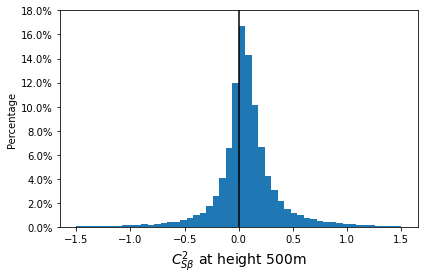

In [71]:
z_coord = 25
C_s_set = Cs_beta_sq[:,:,z_coord].flatten()


z_levels = np.arange(0, 2000, 20)

fig, axs = plt.subplots(1, 1, tight_layout=True)
C_s_set, bins, p = axs.hist(C_s_set, range=(-1.5,1.5), bins=50, density=True)  # density=False would make counts range=(-0.8,0.8),
for item in p:
    item.set_height(item.get_height()/sum(C_s_set))
axs.set_ylabel('Percentage')#'Counts')#'Probability')
axs.set_xlabel('$ C_{S \\beta}^2 $ at height '+str(z_levels[z_coord])+'m', fontsize=14)
axs.yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs.set_ylim(0,0.18)
#axs.set_xlim(-0.01,0.81)
plt.vlines(0, 0, 0.70)
plt.savefig(plotdir+"C_s_beta_sq_dist_gauss"+str(z_levels[z_coord])+"m.png", pad_inches=0)

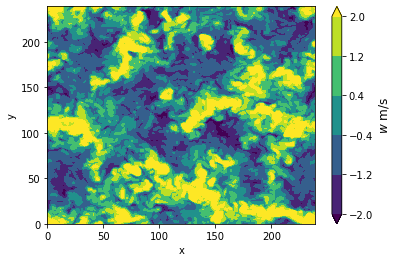

In [145]:
z_levels = np.linspace(0, 2000, 100)

y = 200

levels1 = np.linspace(-2,2,6)
cm1 = plt.contourf(np.transpose(w[:,:,25]), levels1, extend='both')

cb1 = plt.colorbar(cm1)

plt.xlabel("x")
plt.ylabel("y")
cb1.set_label("$w$ m/s", size=12)
plt.savefig(plotdir+"w_horiz_cross.png", pad_inches=0)

In [ ]:
z_coord = 30
C_s_set = C_s2_4[:,:,z_coord].flatten()
w_set = w[:,:,z_coord].flatten()

z_levels = np.arange(0, 2000, 20)

fig, axs = plt.subplots(1, 1, tight_layout=True)
axs.hist2d(C_s_set, w_set, bins=150, range=[[-0.5,0.5],[-2.5,2.5]])#, density=True)  # density=False would make counts. range=(-0.8,0.8),
# for item in p:
#     item.set_height(item.get_height()/sum(C_s_set))
axs.set_ylabel('w (m/s)')#'Counts')#'Probability')
axs.set_xlabel('$ C_{s 4 \\Delta}^2 $ at height '+str(z_levels[z_coord])+'m', fontsize=14)
#axs.yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs.set_ylim(-1.5,1.5)
axs.set_xlim(-0.3,0.3)
plt.vlines(0, -2, 2, 'r')
plt.hlines(0, -2, 2, 'r')
plt.savefig(plotdir+"corr_Cs_sq4_w"+str(z_levels[z_coord])+"m.png", pad_inches=0)

In [ ]:
av_type = "all" #'neg_to_zero'

Cs2_av_lev, LM2_av, MM2_av = dy.Cs_av_levels(L2, M2, av_type)

In [ ]:
x = Cs2_av_lev
y = zn

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()#(1,2)
ax.scatter(x, y, c=z, s=100)
ax.set_ylabel('zn (m)')#'Counts')#'Probability')
ax.set_xlabel('$ C_{s 2 \\Delta} $', fontsize=14)
#cmap = ax[0].scatter(x, y, s=100)
# cbar=fig.colorbar(cmap)
# cbar.set_label('', rotation=270)
plt.savefig(plotdir+"Cs2_zn_"+str(av_type)+".png", pad_inches=0)

In [ ]:
def split_list(a_list):
    half = len(a_list)//2
    return a_list[:half] #, a_list[half:]

In [ ]:
#only looking at boundary layer

x_temp = split_list(Cs2_av_lev)
x = np.delete(x_temp, [0,1])
y_temp = split_list(zn)
y = np.delete(y_temp, [0,1])

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()#(1,2)
ax.scatter(x, y, c=z, s=100)
ax.set_ylabel('zn (m)')#'Counts')#'Probability')
ax.set_xlabel('$ C_{s 2 \\Delta} $', fontsize=14)
#cmap = ax[0].scatter(x, y, s=100)
# cbar=fig.colorbar(cmap)
# cbar.set_label('', rotation=270)
plt.savefig(plotdir+"Cs2_zn_"+str(av_type)+"_zoom.png", pad_inches=0)

In [ ]:
av_type = "all" #'neg_to_zero'

Cs4_av_lev, LM4_av, MM4_av = dy.Cs_av_levels(L4, M4, av_type)

In [ ]:
x = Cs4_av_lev
y = zn

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()#(1,2)
ax.scatter(x, y, c=z, s=100)
ax.set_ylabel('zn (m)')#'Counts')#'Probability')
ax.set_xlabel('$ C_{s 4 \\Delta} $', fontsize=14)
#cmap = ax[0].scatter(x, y, s=100)
# cbar=fig.colorbar(cmap)
# cbar.set_label('', rotation=270)
plt.savefig(plotdir+"Cs4_zn_"+str(av_type)+".png", pad_inches=0)

In [ ]:
#only looking at boundary layer

x_temp = split_list(Cs4_av_lev)
x = np.delete(x_temp, [0,1])
y_temp = split_list(zn)
y = np.delete(y_temp, [0,1])

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()#(1,2)
ax.scatter(x, y, c=z, s=100)
ax.set_ylabel('zn (m)')#'Counts')#'Probability')
ax.set_xlabel('$ C_{s 4 \\Delta} $', fontsize=14)
#cmap = ax[0].scatter(x, y, s=100)
# cbar=fig.colorbar(cmap)
# cbar.set_label('', rotation=270)
plt.savefig(plotdir+"Cs4_zn_"+str(av_type)+"_zoom.png", pad_inches=0)

In [ ]:
#print(LM_av)

In [ ]:
x_temp = LM_av
x = np.delete(x_temp, [0,1])
y_temp = zn
y = np.delete(y_temp, [0,1])


# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()#(1,2)
ax.scatter(x, y, c=z, s=100)
ax.set_ylabel('zn (m)')#'Counts')#'Probability')
ax.set_xlabel('$ L_{ij} M_{ij} $', fontsize = 14)
#cmap = ax[0].scatter(x, y, s=100)
# cbar=fig.colorbar(cmap)
# cbar.set_label('', rotation=270)
plt.savefig(plotdir+"LM_zn.png", pad_inches=0)

In [ ]:
x_temp = MM_av
x = np.delete(x_temp, [0])
y_temp = zn
y = np.delete(y_temp, [0])


# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()#(1,2)
ax.scatter(x, y, c=z, s=100)
ax.set_ylabel('zn (m)')#'Counts')#'Probability')
ax.set_xlabel('$ M_{ij} M_{ij} $', fontsize = 14)
#cmap = ax[0].scatter(x, y, s=100)
# cbar=fig.colorbar(cmap)
# cbar.set_label('', rotation=270)
plt.savefig(plotdir+"MM_zn.png", pad_inches=0)

In [ ]:
z_levels = np.linspace(0, 2000, 100)

x = 200

levels1 = np.linspace(-0.6,0.6,7)
cm1 = plt.contourf(np.transpose(C_s[x,:,:]), levels1, extend='both')

cb1 = plt.colorbar(cm1)

plt.xlabel("x")
plt.ylabel("z")
cb1.set_label("C_s", size=12)
plt.savefig(plotdir+"Cs_cross_sec.png", pad_inches=0)

In [ ]:
#S_ij = dy.S_ij(u_f, v_f, w_f,20)

In [ ]:
#print(np.shape(S_ij))

In [ ]:
# abs_S = dy.abs_S(S_ij)
# print(np.shape(abs_S))
# print(abs_S)

In [ ]:
# print(np.shape(abs_S*S_ij))

In [ ]:
z_levels = np.linspace(0, 2000, 100)

plt.contourf(np.transpose(abs_S[125,:,:]))
plt.xlabel("x")
plt.ylabel("z")
#plt.yticks(z_levels)
cb = plt.colorbar()
cb.set_label("|S|", size=12)

In [ ]:
z_levels = np.linspace(0, 2000, 100)

plt.contourf(np.transpose(abs_S[125,:,:]))
plt.xlabel("x")
plt.ylabel("z")
plt.ylim(0, 10)
#plt.yticks(z_levels)
cb = plt.colorbar()
cb.set_label("|S|", size=12)

In [ ]:
plt.contourf(np.transpose(L_ij[2,2][125,:,:]))
plt.xlabel("x")
plt.ylabel("z")
#plt.yticks(z_levels)
cb = plt.colorbar()
cb.set_label("L_ij", size=12)

In [ ]:
plt.contourf(np.transpose(S_ij[2,2][25,:,:]))
plt.xlabel("x")
plt.ylabel("z")
#plt.yticks(z_levels)
cb = plt.colorbar()
cb.set_label("S_33", size=12)

In [ ]:
print(S_ij[0,0][5,5,5] + S_ij[1,1][5,5,5] + S_ij[2,2][5,5,5])

In [ ]:
diag_S_ij = 0
for i in range(3):
    diag_S_ij += S_ij[i,i]

print(np.round(diag_S_ij, 3))

In [ ]:
delta = 25

sig_smag = 2/np.pi * delta
print(sig_smag)

D_eff = (np.pi/1.517)*sig_smag
print(D_eff)

sig_match = np.sqrt( (2.3 * D_eff**2)/(np.pi**2) - 12.8**2 ) #12.8 is sig_smag for 20m
print(sig_match)